## **1.7 Bài tập - trang 38, 39**

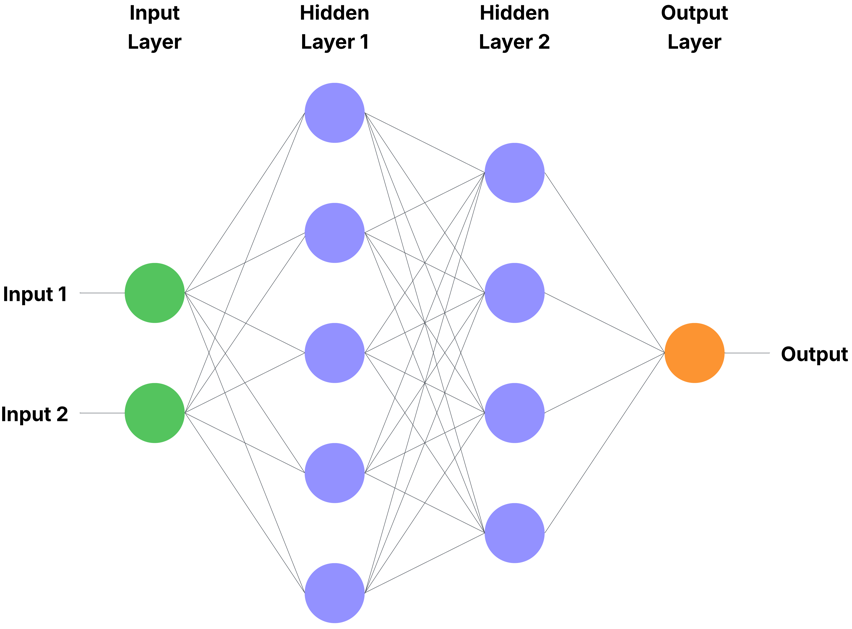

## **Bài 1 - Tính Toán Forward Propagation**

---

### **1. Công thức tổng quát cho từng nơ-ron**

Trong một mạng Feedforward, giá trị đầu ra của một nơ-ron được tính qua hai bước:

- **Tổng tuyến tính (Linear Sum):** $z = \sum (x_i \cdot w_i) + b$
- **Hàm kích hoạt (Activation Function):** $a = f(z)$

Dưới dạng ma trận cho một lớp (layer), công thức là:
$$A^{(n)} = f(X \cdot W^{(n)} + b^{(n)})$$

---

### **2. Các hàm kích hoạt phổ biến**

Tùy vào mục đích của từng tầng, ta áp dụng các hàm kích hoạt khác nhau:

- **Sigmoid:** Thường dùng cho xác suất hoặc các tầng ẩn cũ.
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
- **ReLU (Rectified Linear Unit):** Phổ biến nhất cho các tầng ẩn giúp tránh triệt tiêu đạo hàm.
$$f(z) = \max(0, z)$$
- **Softmax:** Thường dùng cho tầng cuối của bài toán phân loại nhiều lớp (tổng các đầu ra bằng 1).
$$\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum e^{z_j}}$$

---

### **3. Tính toán Forward Propagation (Lan truyền tiến)**
Giả sử ta có: 

| Ký hiệu | Ý nghĩa              | Shape    |
| ------- | ---------------------| -------- |
| $X$     | Dữ liệu đầu vào XOR  | $(4, 2)$ |
| $W_1$   | Trọng số layer 1     | $(2, 5)$ |
| $b_1$   | Bias layer 1         | $(1, 5)$ |
| $W_2$   | Trọng số layer 2     | $(5, 4)$ |
| $b_2$   | Bias layer 2         | $(1, 4)$ |
| $W_3$   | Trọng số output      | $(4, 1)$ |
| $b_3$   | Bias output          | $(1, 1)$ |

Để đơn giản hóa việc tính tay, ta xét **1 mẫu dữ liệu** (dòng đầu tiên của $X$) có giá trị $x = [0, 0]$.  

**Bước 1: Từ Input vào Hidden Layer 1** 

- **Giả định $W_1$:** Tất cả giá trị là $0.1$; **$b_1$:** Tất cả là $0$.        
$$z_1 = x \cdot W_1 + b_1 = [0, 0] \cdot \begin{bmatrix} 0.1 & 0.1 & 0.1 & 0.1 & 0.1 \\ 0.1 & 0.1 & 0.1 & 0.1 & 0.1 \end{bmatrix} + [0, 0, 0, 0, 0]$$
$$z_1 = [0, 0, 0, 0, 0]$$
- **Áp dụng ReLU:** $a_1 = \text{ReLU}(z_1) = [0, 0, 0, 0, 0]$

**Bước 2: Từ Hidden Layer 1 vào Hidden Layer 2**

- **Giả định $W_2$:** Tất cả giá trị là $0.2$; **$b_1$:** Tất cả là $0.1$.
$$z_2 = a_1 \cdot W_2 + b_2 = [0.1, 0.1, 0.1, 0.1, 0.1]$$
- **Áp dụng ReLU:** $a_2 = \text{ReLU}(z_2) = [0.1, 0.1, 0.1, 0.1, 0.1]$

**Bước 3: Từ Hidden Layer 2 ra Output**

- **Giả định $W_3$:** Tất cả giá trị là $0.5$; **$b_1$:** $0$.
$$z_3 = a_2 \cdot W_3 + b_3 = 0.2$$

--- 

### **4. Kết quả cuối cùng theo hàm kích hoạt**
Tại tầng Output, giá trị cuối cùng $y_{hat}$ sẽ phụ thuộc vào hàm kích hoạt:

| Hàm kích hoạt | Công thức              | Kết quả ($z_3=0.2$)    |
| ------------- | -----------------------| ---------------------- |
| **Sigmoid**   | $1 / (1 + e^{-z_3})$   | ~$0.55$                |
| **ReLU**      | $max(0, z_3)$          | $0.2$                  |

---

## **Bài 2 - Tính Toán Backpropagation**

--- 

### **1. Công thức cập nhật trọng số tổng quát**

Theo thuật toán **Gradient Descent**, trọng số mới được cập nhật bằng cách đi ngược hướng với Gradient của hàm mất mát:
$$W_{new} = W_{old} - \eta \cdot \frac{\partial L}{\partial W}$$
$$b_{new} = b_{old} - \eta \cdot \frac{\partial L}{\partial b}$$
Trong đó:

- $\eta$ (Eta): Tốc độ học (Learning Rate).
- $\frac{\partial L}{\partial W}$: Đạo hàm riêng của hàm mất mát theo trọng số (Gradient).

---

### **2. Tính toán Gradient bằng quy tắc chuỗi (Chain Rule)**

Chúng ta sẽ tính Gradient cho tầng cuối cùng ($W_3$) vì nó trực tiếp nhất, sau đó lan truyền ngược về các tầng trước.

Giả định số liệu:

- Giá trị dự đoán từ bước trước: $\hat{y} = 0.55$ (dùng Sigmoid).
- Giá trị thực tế (Ground Truth): $y = 0$.
- Đầu vào tầng cuối ($a_2$): $[0.1, 0.1, 0.1, 0.1]$.  

**Bước 1: Tính Gradient tại Output ($\frac{\partial L}{\partial \hat{y}}$)**
$$\frac{\partial L}{\partial \hat{y}} = y - \hat{y} = 0 - 0.55 = -0.55$$

**Bước 2: Tính Gradient đối với $W_3$**

Để tính $\frac{\partial L}{\partial W_3}$, ta phân rã:
$$\frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_3} \cdot \frac{\partial z_3}{\partial W_3}$$

- Đạo hàm Sigmoid: $\frac{\partial \hat{y}}{\partial z_3} = \hat{y}(1 - \hat{y}) = 0.55 \times (1 - 0.55) \approx 0.2475$.
- Đạo hàm tổng tuyến tính: Vì $z_3 = a_2 \cdot W_3 + b_3$ nên $\frac{\partial z_3}{\partial W_3} = a_2$.

**Kết quả Gradient cho $W_3$:**
$$\frac{\partial L}{\partial W_3} = -0.55 \times 0.2475 \times [0.1, 0.1, 0.1, 0.1]^T = [-0.014, -0.014, -0.014, -0.014]^T$$

---

### **3. Xác định hướng cập nhật (Gradient Descent)**

Gradient mang giá trị **âm** ($\approx -0.014$). Điều này có nghĩa là:

- Nếu **tăng** trọng số $W_3$, hàm mất mát $L$ sẽ **giảm**.
- Vì thuật toán là $W_{new} = W - \eta \cdot (\text{Gradient})$, trừ cho một số âm sẽ thành cộng.

**Thực hiện cập nhật (với $\eta = 0.1$):**
$$W_{3(new)} = [0.5, 0.5, 0.5, 0.5]^T - 0.1 \times [-0.014, -0.014, -0.014, -0.014]^T = [0.5014, 0.5014, 0.5014, 0.5014]^T$$

**Tóm tắt hướng cập nhật:** 

- Trọng số $W_3$ tăng nhẹ từ $0.5$ lên $0.5014$.
- Điều này khiến $z_3$ tăng lên.
- Khi $z_3$ tăng, $\hat{y}$ (Sigmoid) sẽ tăng từ $0.55$ tiến gần hơn về mục tiêu $1.0$.
- Sai số (Loss) sẽ nhỏ đi ở lần lặp tiếp theo.

---

## **Bài 3 - Viết code huấn luyện ANN với Gradient Descent**

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Import thư viện 
import math 
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
# Định nghĩa hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Đạo hàm sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:
# Dữ liệu giả dịnh 
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [5]:
# Khởi tạo trọng số 
np.random.seed(42)
W1 = np.random.rand(2, 5)
b1 = np.random.rand(1, 5)
W2 = np.random.rand(5, 4)
b2 = np.random.rand(1, 4)
W3 = np.random.rand(4, 1)
b3 = np.random.rand(1, 1)

lr = 0.5  # learning rate
epochs = 4000

In [6]:
loss_history = [] # Lưu trữ lịch sử loss

# Vòng lặp huấn luyện
for epoch in range(epochs):
    # Forward propagation
    a1 = sigmoid(np.dot(X, W1) + b1)
    a2 = sigmoid(np.dot(a1, W2) + b2)
    output = sigmoid(np.dot(a2, W3) + b3)
    
    # Tính Loss (Mean Squared Error)
    loss = np.mean(0.5 * (y - output) ** 2)
    loss_history.append(loss) 
    
    # Backpropagation (Chain Rule)
    dz3 = (output - y) * sigmoid_derivative(output)
    dW3 = np.dot(a2.T, dz3)
    
    dz2 = np.dot(dz3, W3.T) * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, dz2)
    
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1)
    
    # Cập nhật trọng số 
    W3 -= lr * dW3
    W2 -= lr * dW2
    W1 -= lr * dW1
    
    # Cập nhật bias
    b3 -= lr * np.sum(dz3, axis=0, keepdims=True)
    b2 -= lr * np.sum(dz2, axis=0, keepdims=True)
    b1 -= lr * np.sum(dz1, axis=0, keepdims=True)

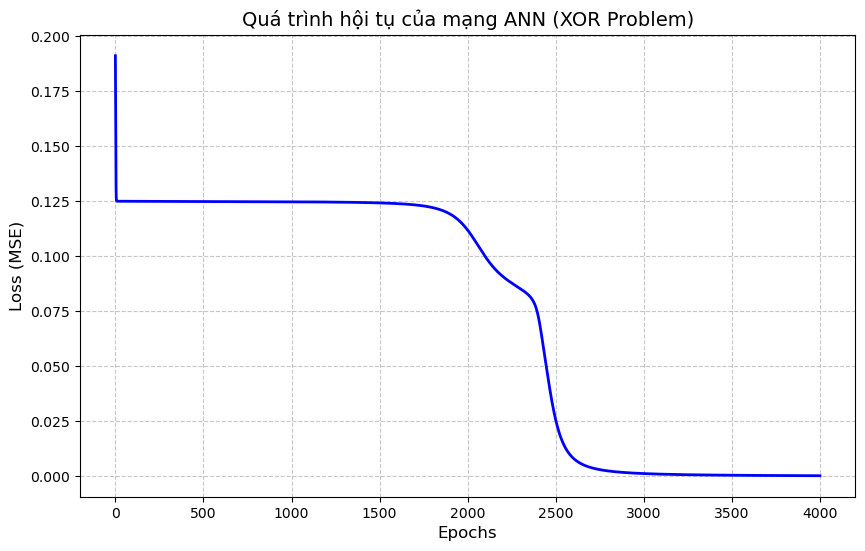

In [7]:
# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(10, 6))
plt.plot(loss_history, color='blue', linewidth=2)
plt.title('Quá trình hội tụ của mạng ANN (XOR Problem)', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [8]:
# Kiểm tra kết quả cuối cùng
print("--- Kết quả dự đoán cuối cùng ---")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Dự đoán: {output[i][0]:.4f} (Thực tế: {y[i][0]})")

--- Kết quả dự đoán cuối cùng ---
Input: [0 0] -> Dự đoán: 0.0226 (Thực tế: 0)
Input: [0 1] -> Dự đoán: 0.9773 (Thực tế: 1)
Input: [1 0] -> Dự đoán: 0.9720 (Thực tế: 1)
Input: [1 1] -> Dự đoán: 0.0296 (Thực tế: 0)


## **Bài 4 - Tối ưu hóa bằng kỹ thuật Regularization**

### **1. L1/L2 Regularization (Giảm Overfitting)**

Kỹ thuật này thêm một "hình phạt" vào hàm mất mát dựa trên độ lớn của trọng số $W$.

- **L2 (Weight Decay):** Cộng thêm $\frac{\lambda}{2} \sum W^2$ vào Loss. Khi đạo hàm, Gradient của $W$ sẽ cộng thêm $\lambda W$. Điều này ép các trọng số nhỏ lại, tránh việc một vài kết nối quá lớn gây nhiễu4.
- **L1:** Cộng thêm $\lambda \sum |W|$, ép các trọng số không quan trọng về đúng bằng 0, giúp chọn lọc đặc trưng.

### **2. Dropout (Ngăn chặn sự phụ thuộc)**

Trong mỗi bước huấn luyện, chúng ta sẽ "ngắt" ngẫu nhiên một tỷ lệ nơ-ron (ví dụ 20%) trong các tầng ẩn.

- Việc này buộc mạng phải học các cấu trúc dữ liệu dư thừa, không được phép dựa dẫm vào một nơ-ron cụ thể nào.
- **Lưu ý:** Dropout chỉ dùng khi **Training**, khi **Inference** (dự đoán) ta phải sử dụng toàn bộ nơ-ron và nhân với tỉ lệ giữ lại để cân bằng giá trị đầu ra.

### **3. Batch Normalization (Tăng tốc hội tụ)**

Chuẩn hóa đầu vào của mỗi tầng (trước hàm kích hoạt) sao cho có trung bình bằng 0 và phương sai bằng 1.

- Giúp giảm hiện tượng **Internal Covariate Shift**, cho phép sử dụng *learning_rate* lớn hơn mà không sợ mất ổn định.

In [9]:
# Hyperparameters mở rộng
lambda_l2 = 0.0001  # L2 Regularization factor
dropout_rate = 0.1
lr = 0.1

for epoch in range(epochs):
    # --- FORWARD PASS WITH DROPOUT ---
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    # Dropout tầng 1
    mask1 = (np.random.rand(*a1.shape) > dropout_rate) / (1.0 - dropout_rate)
    a1 *= mask1
    
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    # Dropout tầng 2
    mask2 = (np.random.rand(*a2.shape) > dropout_rate) / (1.0 - dropout_rate)
    a2 *= mask2
    
    y_hat = sigmoid(np.dot(a2, W3) + b3) 

    # --- BACKPROPAGATION WITH L2 ---
    dz3 = (y_hat - y) * sigmoid_derivative(y_hat) 
    # Thêm đạo hàm của L2: lambda * W
    dW3 = np.dot(a2.T, dz3) + lambda_l2 * W3 
    
    dz2 = np.dot(dz3, W3.T) * sigmoid_derivative(a2) * mask2
    dW2 = np.dot(a1.T, dz2) + lambda_l2 * W2
    
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1) * mask1
    dW1 = np.dot(X.T, dz1) + lambda_l2 * W1

    # Cập nhật Gradient Descent 
    W3 -= lr * dW3; b3 -= lr * np.sum(dz3, axis=0, keepdims=True)
    W2 -= lr * dW2; b2 -= lr * np.sum(dz2, axis=0, keepdims=True)
    W1 -= lr * dW1; b1 -= lr * np.sum(dz1, axis=0, keepdims=True)

In [10]:
# Kiểm tra kết quả cuối cùng
print("--- Kết quả dự đoán cuối cùng ---")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Dự đoán: {y_hat[i][0]:.4f} (Thực tế: {y[i][0]})")

--- Kết quả dự đoán cuối cùng ---
Input: [0 0] -> Dự đoán: 0.0361 (Thực tế: 0)
Input: [0 1] -> Dự đoán: 0.4713 (Thực tế: 1)
Input: [1 0] -> Dự đoán: 0.5062 (Thực tế: 1)
Input: [1 1] -> Dự đoán: 0.7528 (Thực tế: 0)


Với bài toán XOR chỉ có **4 mẫu dữ liệu**, việc dùng Regularization mạnh giống như việc "dùng dao mổ trâu để giết gà":

- **L2 Regularization quá cao:** Khi hệ số $\lambda$ lớn, thuật toán Gradient Descent sẽ ép các trọng số $W$ về rất gần mức 0 để giảm thiểu hàm mất mát2222. Khi $W \approx 0$, giá trị $z = XW + b$ cũng gần bằng 0. Theo hàm Sigmoid, $\sigma(0) = 0.5$. Do đó, mô hình bị "đơ" tại mức 0.5.
- **Dropout quá cao:** Với tầng ẩn chỉ có 4-5 nơ-ron, nếu bạn ngắt (dropout) 20-50% số nơ-ron, mạng ANN sẽ bị mất đi những "mắt xích" quan trọng để hiểu được logic phức tạp của XOR.
- **Dữ liệu quá ít:** Regularization sinh ra để ngăn mô hình "học vẹt" trên hàng nghìn dữ liệu nhiễu. Với XOR, dữ liệu là hoàn hảo (không có nhiễu), nên việc ngăn chặn mô hình học kỹ thực chất lại là ngăn nó học đúng quy luật.

## **Bài 5 - Huấn luyện mô hình với TensorFlow và PyTorch**

### **1. Cài đặt với TensorFlow/Keras**

In [22]:
# Khởi tạo mô hình Sequential 
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),              # Input layer
    tf.keras.layers.Dense(5, activation='relu'),    # Hidden Layer 1
    tf.keras.layers.Dense(4, activation='relu'),    # Hidden Layer 2
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output Layer
])

# Cấu hình huấn luyện với Gradient Descent (SGD)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='mean_squared_error'
)

# Huấn luyện
model.fit(X, y, epochs=4000, verbose=0)

In [23]:
y_hat = model.predict(X, verbose=0) # Dự đoán cuối cùng

In [ ]:
# Kiểm tra kết quả cuối cùng
print("--- Kết quả dự đoán cuối cùng ---")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Dự đoán: {y_hat[i][0]:.4f} (Thực tế: {y[i][0]})")

--- Kết quả dự đoán cuối cùng ---
Input: [0 0] -> Dự đoán: 0.3336 (Thực tế: 0)
Input: [0 1] -> Dự đoán: 0.3336 (Thực tế: 1)
Input: [1 0] -> Dự đoán: 0.9868 (Thực tế: 1)
Input: [1 1] -> Dự đoán: 0.3336 (Thực tế: 0)


### **2. Cài đặt với PyTorch**

In [14]:
# Dữ liệu dạng Tensor
X_torch = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
y_torch = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [15]:
# Định nghĩa cấu trúc mạng
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 4)
        self.layer3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x)) # Forward Propagation 
        x = self.relu(self.layer2(x)) 
        x = self.sigmoid(self.layer3(x)) 
        return x
    
model_pt = XORNet()
optimizer = optim.SGD(model_pt.parameters(), lr=0.1) # Gradient Descent 
criterion = nn.MSELoss() # Hàm mất mát

In [16]:
# Vòng lặp huấn luyện
for epoch in range(1000):
    optimizer.zero_grad()
    output = model_pt(X_torch)
    loss = criterion(output, y_torch)
    loss.backward() # Backpropagation 
    optimizer.step() # Cập nhật trọng số 

In [17]:
# Kiểm tra kết quả cuối cùng
print("--- Kết quả dự đoán cuối cùng ---")
y_hat = model_pt(X_torch).detach().numpy()
for i in range(len(X)):
    print(f"Input: {X[i]} -> Dự đoán: {y_hat[i][0]:.4f} (Thực tế: {y[i][0]})")

--- Kết quả dự đoán cuối cùng ---
Input: [0 0] -> Dự đoán: 0.5011 (Thực tế: 0)
Input: [0 1] -> Dự đoán: 0.5001 (Thực tế: 1)
Input: [1 0] -> Dự đoán: 0.4999 (Thực tế: 1)
Input: [1 1] -> Dự đoán: 0.4989 (Thực tế: 0)


### **3. So sánh**

| Tiêu chí           | TensorFlow/Keras    | PyTorch       |
| ------------------ | --------------------| ------------- |
| **Độ chính xác**   | Tương đương         | Tương đương   |
| **Tốc độ**         | Chậm hơn            | Nhanh hơn     |

## **Bài 6 - Ứng dụng ANN trên tập MINST**

### **Bài 6.1 - Xây dựng và huấn luyện ANN trên MINST**

In [3]:
# Định nghĩa các hàm biến đổi
transform = transforms.Compose([
    transforms.ToTensor(), # [0, 255] -> [0, 1]
    # transforms.Normalize((0.1307,), (0.3081,)) # Chuẩn hóa dữ liệu để mô hình hội tụ nhanh hơn mean = 0.1307, std = 0.3081 
])

# Tải dữ liệu MNIST với torchvision
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [4]:
# Tách validation từ tập huấn luyện
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

In [5]:
# Tạo data loader để đưa vào mô hình theo từng batch
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False) 

In [8]:
# Tạo iterator từ train_loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

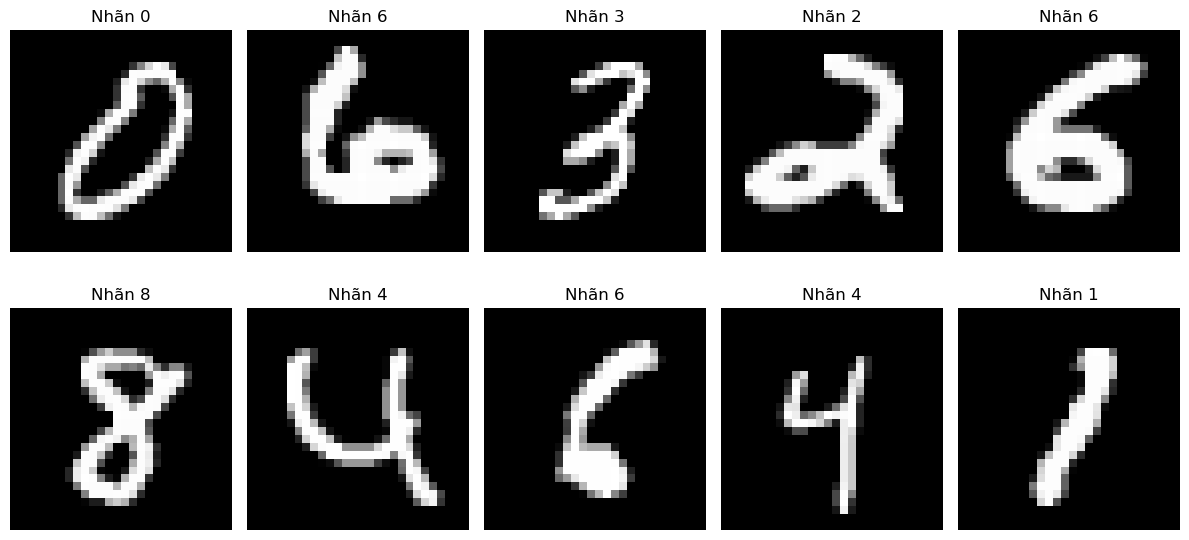

In [28]:
# Hiển thị 10 ảnh đầu tiên của batch
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = images[i].numpy().squeeze()
    plt.imshow(img, cmap='gray')
    plt.title(f'Nhãn {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

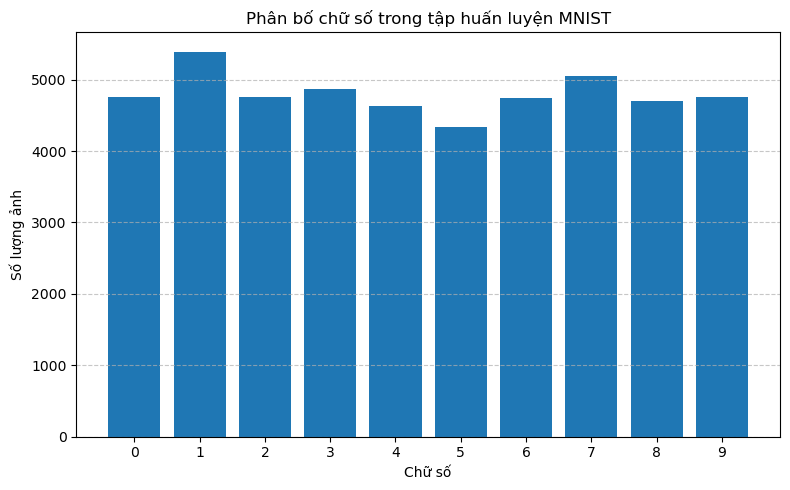

In [63]:
labels = [label for _, label in train_dataset]

unique, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8,5))
plt.bar(unique, counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(10))
plt.xlabel("Chữ số")
plt.ylabel("Số lượng ảnh")
plt.title("Phân bố chữ số trong tập huấn luyện MNIST")
plt.tight_layout()
plt.show()

In [68]:
pd.DataFrame({'Chữ số': unique, 'Số lượng ảnh': counts})

,Chữ số,Số lượng ảnh
0,0,4754
1,1,5393
2,2,4759
3,3,4866
4,4,4638
5,5,4338
6,6,4743
7,7,5057
8,8,4699
9,9,4753


In [108]:
# Định nghĩa cấu trúc mạng ANN cho MNIST
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.flatten = nn.Flatten() # Chuyển đổi ảnh 28x28 thành vector 784 chiều
        
        self.fc1 = nn.Linear(28*28, 512) # Hidden Layer 1
        self.fc2 = nn.Linear(512, 256)    # Hidden Layer 2
        self.fc3 = nn.Linear(256, 128)     # Hidden Layer 3 
        self.fc4 = nn.Linear(128, 10)      # Output Layer
        
    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # Không dùng hàm kích hoạt ở lớp cuối cùng (sẽ dùng CrossEntropyLoss)
        return x

# Khởi tạo mô hình, hàm mất mát và bộ tối ưu hóa
model_mnist = MNISTNet()

In [114]:
# Định nghĩa hàm mất mát và bộ tối ưu hóa
criterion = nn.CrossEntropyLoss()  # Sử dụng CrossEntropyLoss cho bài toán phân loại đa lớp
optimizer = optim.SGD(model_mnist.parameters(), lr=0.0001)

def train_model(epochs):
    for epoch in range(epochs):
        model_mnist.train()  # Chuyển mô hình sang chế độ huấn luyện
        running_loss = 0.0
        
        for images, labels in train_loader:
            # 1. Xóa gradient cũ
            optimizer.zero_grad()
            # 2. Dự báo (Forward pass)
            outputs = model_mnist(images)
            # 3. Tính toán độ lỗi
            loss = criterion(outputs, labels)
            # 4. Lan truyền ngược (Backward pass)
            loss.backward()
            # 5. Cập nhật trọng số
            optimizer.step()
            
            running_loss += loss.item()
            
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')
        
# Chạy huấn luyện mô hình
train_model(epochs=10)

Epoch [1/10], Loss: 0.1966
Epoch [2/10], Loss: 0.1964
Epoch [3/10], Loss: 0.1962
Epoch [4/10], Loss: 0.1960
Epoch [5/10], Loss: 0.1959
Epoch [6/10], Loss: 0.1957
Epoch [7/10], Loss: 0.1956
Epoch [8/10], Loss: 0.1954
Epoch [9/10], Loss: 0.1953
Epoch [10/10], Loss: 0.1951


In [115]:
# Đánh giá trên tập test
def evaluate_model():
    model_mnist.eval()  # Chuyển mô hình sang chế độ đánh giá
    correct = 0
    total = 0
    
    with torch.no_grad():  # Tắt tính toán gradient
        for images, labels in test_loader:
            outputs = model_mnist(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')
    
evaluate_model()

Accuracy of the model on the test images: 94.35%


### **Bài 6.2 - Tối ưu hóa mô hình**

| Lớp ẩn   | 1 (256) | 2 (256 → 128) | 3 (256 → 128 → 64) | 5 (256 → 128 → 64 → 32 → 16) |
| -------- | ------- | ------------- | ------------------ | ---------------------------- |
| Accuracy | 0.9264  | 0.9331        | 0.9319             | 0.8873                       |

> *Số lượng lớp ẩn lý tưởng cho bài toán này là 2 lớp. Việc tăng thêm số lớp (3 hoặc 5 lớp) không những không làm tăng độ chính xác mà còn khiến mô hình khó hội tụ và giảm hiệu suất đáng kể do cấu trúc mạng trở nên quá phức tạp so với dữ liệu.*

| Lớp ẩn   | 128 → 64 → 32 | 512 → 256 → 128 |
| -------- | ------------- | --------------- |
| Accuracy | 0.9287        | 0.9392          |

> *Việc tăng số lượng nơ-ron giúp cải thiện độ chính xác, nhưng nó tốn nhiều tài nguyên tính toán và thời gian huấn luyện lâu hơn so với mạng nhỏ.*

| Learning Rate   | 0.01   | 0.001  | 0.0001 |
| --------------- | ------ | ------ | -------|
| Accuracy        | 0.9392 | 0.9428 | 0.9425 |

> *lr = 0.001 cho accuracy cao nhất, mô hình vừa đạt độ chính xác cao vừa tiết kiệm thời gian huấn luyện.*

### **Bài 6.2 - Giảm Overfitting và sử dụng Early Stopping**


In [119]:
class Optimized_MNIST_ANN(nn.Module):
    def __init__(self):
        super(Optimized_MNIST_ANN, self).__init__()
        self.flatten = nn.Flatten()
        
        # Lớp 1: 512 nơ-ron + Batch Norm + Dropout
        self.fc1 = nn.Linear(784, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.2) # Giảm 20% kết nối ngẫu nhiên
        
        # Lớp 2: 256 nơ-ron + Batch Norm
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        
        # Lớp 3: 128 nơ-ron
        self.fc3 = nn.Linear(256, 128)
        
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.fc2(x)))
        x = torch.relu(self.fc3(x))
        
        return self.out(x)

model = Optimized_MNIST_ANN()

In [120]:
# L2 Regularization được tích hợp qua thông số 'weight_decay' trong Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

In [122]:
def train_with_early_stopping(epochs=50, patience=5):
    best_val_loss = float('inf')
    epochs_no_improve = 0
    
    for epoch in range(epochs):
        # --- GIAI ĐOẠN TRAIN ---
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
        # --- GIAI ĐOẠN VALIDATION ---
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        avg_val_loss = val_loss / len(val_loader)
        print(f"Epoch {epoch+1}: Val Loss = {avg_val_loss:.4f}")
        
        # Kiểm tra điều kiện dừng sớm
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0
            # Lưu lại model tốt nhất
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            epochs_no_improve += 1
            
        if epochs_no_improve == patience:
            print(f"Dừng sớm tại Epoch {epoch+1} vì không cải thiện!")
            break

train_with_early_stopping()

Epoch 1: Val Loss = 0.0670
Epoch 2: Val Loss = 0.0594
Epoch 3: Val Loss = 0.0823
Epoch 4: Val Loss = 0.0707
Epoch 5: Val Loss = 0.0625
Epoch 6: Val Loss = 0.0680
Epoch 7: Val Loss = 0.0708
Dừng sớm tại Epoch 7 vì không cải thiện!


In [123]:
# 1. Khởi tạo lại mô hình với cấu trúc đã tối ưu ở Bài 6.3
model_best = Optimized_MNIST_ANN()

# 2. Tải trọng số tốt nhất đã lưu từ file
model_best.load_state_dict(torch.load('best_model.pth'))
model_best.eval() # Chuyển sang chế độ đánh giá (tắt Dropout, dùng BN tĩnh)

correct = 0
total = 0
test_loss = 0
criterion = torch.nn.CrossEntropyLoss()

# 3. Tiến hành đánh giá (không tính gradient để tiết kiệm bộ nhớ)
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model_best(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        # Lấy chỉ số có giá trị xác suất cao nhất (dự đoán)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 4. Tính toán và in kết quả
avg_test_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total

print(f"--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH TỐI ƯU ---")
print(f"Average Loss trên tập Test: {avg_test_loss:.4f}")
print(f"Độ chính xác (Accuracy) trên tập Test: {accuracy:.2f}%")

--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH TỐI ƯU ---
Average Loss trên tập Test: 0.0657
Độ chính xác (Accuracy) trên tập Test: 98.23%


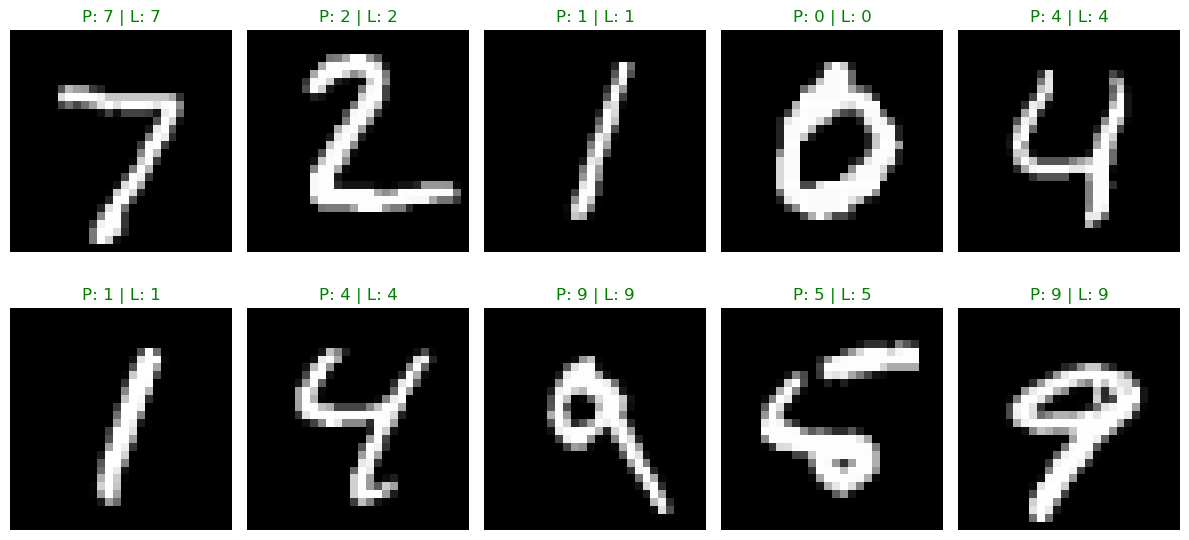

In [124]:
# Lấy 1 batch từ tập test
images, labels = next(iter(test_loader))
outputs = model_best(images)
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = images[i].numpy().squeeze()
    plt.imshow(img, cmap='gray')
    
    # Màu xanh nếu đúng, màu đỏ nếu sai
    color = 'green' if preds[i] == labels[i] else 'red'
    plt.title(f"P: {preds[i].item()} | L: {labels[i].item()}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()